<a href="https://colab.research.google.com/github/sipocz/NRG_estimator/blob/main/NRG_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [582]:
# Energy estimator
# S.L. 2023.10.


In [583]:
import pandas as pd
import plotly.graph_objects as go

In [584]:
def grafikon(fx,desc1,txt1,desc2="",txt2="",ngraf=2,c1='rgba(0,200,0,0.8)', c2='rgba(200,0,0,0.3)',x=None,title=None):
    '''
    grafikon(fx,desc1,txt1,desc2="",txt2="",ngraf=2,c1='rgba(0,200,0,0.8)', c2='rgba(200,0,0,0.3)')

    fx: dataFrame
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c2: color1
    c2: color2

    '''
    #x_=[i for i in range(len(y_pred))]

    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    fig0 = make_subplots(rows=1, cols=1,)

    if x==None:
        x_coordinates=fx.index
    else:
        x_coordinates=fx[x]

    if title==None:
        if txt2=="":
            title=txt1
        else:
            title = txt1+" & "+txt2


    fig0.add_trace(
            go.Scatter(x=x_coordinates, y=fx[desc1], name=txt1,line=dict(color=c1) ,showlegend=True  ),
        row=1, col=1 )

    if ngraf==2:
        fig0.add_trace(
            go.Scatter(x=x_coordinates, y=fx[desc2], name=txt2, line=dict(color=c2) ,showlegend=True  ),
            row=1, col=1
        )

    fig0.update_layout(
        title=title,
        autosize=False,
        width=1200,
        height=600,
        )

    fig0.show()

In [585]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [586]:
goo_drive="/content/gdrive/MyDrive/NRG_estimator"

In [587]:
fit_data=("FIT2631_220101_220801.csv","FIT2631_220801_221231.csv")

In [588]:
rekt_data=("U03_reflux_220101_220701.csv","U03_reflux_220701_230101.csv")

In [589]:
fname_steam=goo_drive+"/"+fit_data[0]
fname_rect=goo_drive+"/"+rekt_data[0]

fname_steam2=goo_drive+"/"+fit_data[1]
fname_rect2=goo_drive+"/"+rekt_data[1]




In [590]:
print("0")

steam_df=pd.read_csv(fname_steam, sep=";",decimal=",",header=None)
steam_df.columns=["Date","Steam","state"]
print("1")
steam_df2=pd.read_csv(fname_steam2, delimiter=";",decimal=",",header=None, low_memory=False,)
steam_df2.columns=["Date","Steam","state"]


print("2")


rekt_df=pd.read_csv(fname_rect,sep=";",decimal=",",header=None)
rekt_df.columns=["Date","Rekt","state"]
print("3")

rekt_df2=pd.read_csv(fname_rect2,delimiter=";",decimal=",",header=None, low_memory=False)
rekt_df2.columns=["Date","Rekt","state"]


0
1
2
3


In [591]:
steam_df2.describe()

Date        Steam   state
count    618905       618905  618905
unique   599182         1350       3
top     No Data  0,251773864      OK
freq      12800        77042  606045

In [592]:
steam_df.tail()

Date  Steam state
842483  2022.07.31 23:58:53   0.29    OK
842484  2022.07.31 23:59:13   0.93    OK
842485  2022.07.31 23:59:33   0.41    OK
842486  2022.07.31 23:59:53   0.25    OK
842487   2022.08.01 0:00:33   0.55    OK

In [593]:
steam_df_big=pd.concat([steam_df,steam_df2], axis=0)
rekt_df_big=pd.concat([rekt_df,rekt_df2],axis=0)


In [594]:
steam_df2.describe()

Date        Steam   state
count    618905       618905  618905
unique   599182         1350       3
top     No Data  0,251773864      OK
freq      12800        77042  606045

In [595]:
steam_df_big.tail()

Date        Steam state
635236  2022.12.31 23:58:45  0,518806756    OK
635237  2022.12.31 23:59:06  0,596627772    OK
635238  2022.12.31 23:59:18  0,332646668    OK
635239  2022.12.31 23:59:39  0,289921403    OK
635240  2022.12.31 23:59:58  0,405889988    OK

In [524]:
print(f"{steam_df_big.isnull().sum()} \ndarab  NAN van a DF-ben" )

Date     16336
Steam    16336
state    16336
dtype: int64 
darab  NAN van a DF-ben


In [525]:
steam_df_big.dropna(inplace=True)
rekt_df_big.dropna(inplace=True)

In [526]:
steam_df_big[steam_df_big["Date"]=="No Data"]

Date    Steam    state
20464  No Data  No Data  No Data
20465  No Data  No Data  No Data
20466  No Data  No Data  No Data
20467  No Data  No Data  No Data
20468  No Data  No Data  No Data
...        ...      ...      ...
49595  No Data  No Data  No Data
49596  No Data  No Data  No Data
49597  No Data  No Data  No Data
49598  No Data  No Data  No Data
49599  No Data  No Data  No Data

[12800 rows x 3 columns]

In [527]:
steam_df_big.drop(steam_df_big[steam_df_big["Date"]=="No Data"].index,inplace=True)
rekt_df_big.drop(rekt_df_big[rekt_df_big["Date"]=="No Data"].index,inplace=True)

In [528]:
steam_df_big["Date"]=pd.to_datetime(steam_df_big["Date"])

rekt_df_big["Date"]=pd.to_datetime(rekt_df_big["Date"])


In [529]:
steam_df_big.Steam=steam_df_big.Steam.astype(str)
steam_df_big.Steam=steam_df_big.Steam.apply(lambda x: x.replace(',','.'))
steam_df_big.Steam=steam_df_big.Steam.astype(float)
rekt_df_big.Rekt=rekt_df_big.Rekt.astype(str)
rekt_df_big.Rekt=rekt_df_big.Rekt.apply(lambda x: x.replace(',','.'))
rekt_df_big.Rekt=rekt_df_big.Rekt.astype(float)




In [530]:
steam_df_big.head()

Date  Steam state
0 2022-01-01 00:00:09   0.37    OK
1 2022-01-01 00:00:29   0.33    OK
2 2022-01-01 00:00:50   0.44    OK
3 2022-01-01 00:01:09   0.55    OK
4 2022-01-01 00:01:29   0.29    OK

In [531]:
day_sample=3*60*24

In [532]:
print(f"{day_sample=}")

day_sample=4320


In [533]:
steam_df_big.set_index("Date",inplace=True)




In [534]:
rekt_df_big.set_index("Date",inplace=True)

In [535]:
steam_df_big.reindex()

Steam state
Date                            
2022-01-01 00:00:09   0.37    OK
2022-01-01 00:00:29   0.33    OK
2022-01-01 00:00:50   0.44    OK
2022-01-01 00:01:09   0.55    OK
2022-01-01 00:01:29   0.29    OK
...                    ...   ...
2022-12-31 23:58:45   0.52    OK
2022-12-31 23:59:06   0.60    OK
2022-12-31 23:59:18   0.33    OK
2022-12-31 23:59:39   0.29    OK
2022-12-31 23:59:58   0.41    OK

[1435793 rows x 2 columns]

In [536]:

steam_mean_10m_df =  steam_df_big.resample("10min").agg({'Steam': 'mean'})
rekt_mean_10m_df =  rekt_df_big.resample("10min").agg({'Rekt': 'mean'})

steam_mean_1h_df =  steam_df_big.resample("60min").agg({'Steam': 'mean'})
rekt_mean_1h_df =  rekt_df_big.resample("60min").agg({'Rekt': 'mean'})



In [537]:
steam_mean_1h_df.tail()

Steam
Date                      
2022-12-31 19:00:00   0.58
2022-12-31 20:00:00   0.52
2022-12-31 21:00:00   0.59
2022-12-31 22:00:00   0.58
2022-12-31 23:00:00   0.57

In [538]:
grafikon(steam_mean_1h_df,"Steam","Gőzfogyasztás",ngraf=1,c1="rgba(20,20,20,0.8)")

In [539]:
grafikon(rekt_mean_1h_df,"Rekt","Rektifikálás",ngraf=1,c1="rgba(20,20,20,0.8)")

In [540]:
len(rekt_mean_1h_df)

8760

In [541]:
len(steam_mean_10m_df)

52560

In [542]:
rekt_mean_10m_df.head()

Rekt
Date                     
2022-01-01 00:00:00  2.93
2022-01-01 00:10:00  2.89
2022-01-01 00:20:00  2.89
2022-01-01 00:30:00  2.89
2022-01-01 00:40:00  2.93

In [543]:
steam_mean_10m_df.head()

Steam
Date                      
2022-01-01 00:00:00   0.43
2022-01-01 00:10:00   0.47
2022-01-01 00:20:00   0.38
2022-01-01 00:30:00   0.40
2022-01-01 00:40:00   0.53

In [544]:
# összerakjuk a két dataframe adatait


In [545]:
all_df=pd.concat([rekt_mean_10m_df,steam_mean_10m_df],axis=1)
all_df_1h=pd.concat([rekt_mean_1h_df,steam_mean_1h_df],axis=1)


In [546]:
all_df_1h.head()

Rekt  Steam
Date                            
2022-01-01 00:00:00  2.91   0.44
2022-01-01 01:00:00  2.90   0.45
2022-01-01 02:00:00  2.93   0.40
2022-01-01 03:00:00  2.92   0.48
2022-01-01 04:00:00  2.93   0.45

In [547]:
all_df_1h.corr()

Rekt  Steam
Rekt   1.00   0.47
Steam  0.47   1.00

In [548]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from statsmodels.tsa.seasonal import  seasonal_decompose

import matplotlib as mpl

In [549]:
print(f"{all_df.isnull().sum()} \ndarab  NAN van a DF-ben" )

Rekt     991
Steam    876
dtype: int64 
darab  NAN van a DF-ben


In [550]:
all_df.dropna(inplace=True)

In [551]:
all_df_1h.dropna(inplace=True)

In [552]:
all_df_1h.head()

Rekt  Steam
Date                            
2022-01-01 00:00:00  2.91   0.44
2022-01-01 01:00:00  2.90   0.45
2022-01-01 02:00:00  2.93   0.40
2022-01-01 03:00:00  2.92   0.48
2022-01-01 04:00:00  2.93   0.45

In [553]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
data1 = seasonal_decompose(all_df_1h["Rekt"][0:-1].values,model="additive", period=24*7) # 10 percenként vannak a minták

fig2 = make_subplots(rows=4, cols=1,shared_xaxes=True)
fig2.add_trace(
    go.Scatter(x=all_df_1h.index[0:-1], y=data1.resid,name="Residual" ),

    row=1, col=1
)
fig2.add_trace(
    go.Scatter( x=all_df_1h.index[0:-1], y=data1.trend,name="Trend"),

    row=2, col=1
)
fig2.add_trace(
    go.Scatter( x=all_df_1h.index[0:-1], y=data1.seasonal,name="Seasonal"),

    row=3, col=1
)

fig2.add_trace(
    go.Scatter( x=all_df_1h.index[0:-1], y=data1.observed,name="Observed"),

    row=4, col=1
)

fig2.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
)

fig2.show()


In [554]:
# METEOSTAT data access

In [555]:
!pip install meteostat

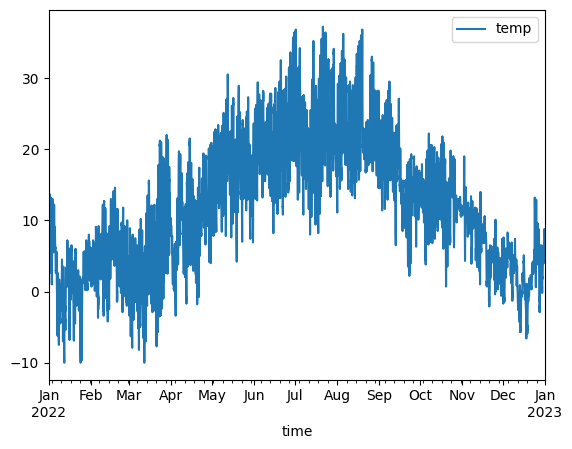

In [556]:
'''
Dorog Historical meteo Data
"""
'''
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Daily, Point, Hourly


dorog = Point(47.724289, 18.723552, 110)

# Time period
start = datetime(2022, 1, 1)
end = datetime(2023, 1, 1)

# Get monthly data
# Then, aggregate annually
weather_data = Hourly(dorog, start, end)
weather_data = weather_data.normalize().aggregate(freq="1h").fetch()

# Plot chart
weather_data.plot(y="temp")
plt.show()

In [557]:
weather_data

temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2022-01-01 00:00:00  3.70  3.10 96.00  0.00   NaN 300.00  7.20 16.70 1020.20   
2022-01-01 01:00:00  2.50  1.80 95.00  0.00   NaN 287.00  4.00 18.50 1019.90   
2022-01-01 02:00:00  7.20  6.80 97.00  0.00   NaN 295.00 10.80 25.90 1019.80   
2022-01-01 03:00:00  9.50  6.40 81.00  0.00   NaN 290.00 10.80 27.80 1020.10   
2022-01-01 04:00:00  8.60  5.20 79.00  0.00   NaN 300.00 10.80 33.30 1020.70   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2022-12-31 20:00:00  7.90  6.20 89.00  0.00   NaN 150.00  7.20 14.80 1026.00   
2022-12-31 21:00:00  7.40  5.90 90.00  0.00   NaN 110.00  7.20 14.80 1026.00   
2022-12-31 22:00:00  5.70  4.50 92.00  0.00   NaN  71.00  7.60 11.10 1026.70   
2022-12-31 23:00:00  5.30  4.30 93.00  0.00   NaN  60.00  7.20 13.00 1026.70   
2023-01-01 00:00:00  4.60  3.70 94.00  0.00   NaN  50.00  3.60 14.80 1026.50   

                     tsun  coco  
time                             
2022-01-01 00:00:00  0.00  3.00  
2022-01-01 01:00:00  0.00  3.00  
2022-01-01 02:00:00  0.00  3.00  
2022-01-01 03:00:00  0.00  3.00  
2022-01-01 04:00:00  0.00  3.00  
...                   ...   ...  
2022-12-31 20:00:00  0.00  3.00  
2022-12-31 21:00:00  0.00  3.00  
2022-12-31 22:00:00  0.00  3.00  
2022-12-31 23:00:00  0.00  3.00  
2023-01-01 00:00:00  0.00  3.00  

[8761 rows x 11 columns]

In [558]:
all_data=pd.concat([all_df_1h,weather_data],axis=1)

In [559]:
all_data

Rekt  Steam  temp  dwpt  rhum  prcp  snow   wdir  wspd  \
2022-01-01 00:00:00  2.91   0.44  3.70  3.10 96.00  0.00   NaN 300.00  7.20   
2022-01-01 01:00:00  2.90   0.45  2.50  1.80 95.00  0.00   NaN 287.00  4.00   
2022-01-01 02:00:00  2.93   0.40  7.20  6.80 97.00  0.00   NaN 295.00 10.80   
2022-01-01 03:00:00  2.92   0.48  9.50  6.40 81.00  0.00   NaN 290.00 10.80   
2022-01-01 04:00:00  2.93   0.45  8.60  5.20 79.00  0.00   NaN 300.00 10.80   
...                   ...    ...   ...   ...   ...   ...   ...    ...   ...   
2022-12-31 20:00:00  3.02   0.52  7.90  6.20 89.00  0.00   NaN 150.00  7.20   
2022-12-31 21:00:00  2.99   0.59  7.40  5.90 90.00  0.00   NaN 110.00  7.20   
2022-12-31 22:00:00  3.02   0.58  5.70  4.50 92.00  0.00   NaN  71.00  7.60   
2022-12-31 23:00:00  3.01   0.57  5.30  4.30 93.00  0.00   NaN  60.00  7.20   
2023-01-01 00:00:00   NaN    NaN  4.60  3.70 94.00  0.00   NaN  50.00  3.60   

                     wpgt    pres  tsun  coco  
2022-01-01 00:00:00 16.70 1020.20  0.00  3.00  
2022-01-01 01:00:00 18.50 1019.90  0.00  3.00  
2022-01-01 02:00:00 25.90 1019.80  0.00  3.00  
2022-01-01 03:00:00 27.80 1020.10  0.00  3.00  
2022-01-01 04:00:00 33.30 1020.70  0.00  3.00  
...                   ...     ...   ...   ...  
2022-12-31 20:00:00 14.80 1026.00  0.00  3.00  
2022-12-31 21:00:00 14.80 1026.00  0.00  3.00  
2022-12-31 22:00:00 11.10 1026.70  0.00  3.00  
2022-12-31 23:00:00 13.00 1026.70  0.00  3.00  
2023-01-01 00:00:00 14.80 1026.50  0.00  3.00  

[8761 rows x 13 columns]

In [560]:
del all_data["snow"]

In [561]:
print(f"{all_data.isnull().sum()} \ndarab  NAN van a DF-ben" )

Rekt     237
Steam    237
temp       0
dwpt       0
rhum       0
prcp       0
wdir       0
wspd       0
wpgt     263
pres       0
tsun       0
coco     241
dtype: int64 
darab  NAN van a DF-ben


In [562]:
all_data.dropna(inplace=True)

In [563]:
# Model building started....

In [564]:
from sklearn.linear_model import Lasso


predictors=["Rekt","temp","dwpt","rhum","wdir","wspd","pres"]


alpha=0.001
lassoreg = Lasso(alpha=alpha, max_iter=42000, tol=0.000000001)
lassoreg.fit(all_data[predictors],all_data[["Steam"]])
y_pred = lassoreg.predict(all_data[predictors])

In [565]:
df_to_view=pd.DataFrame()
df_to_view=all_data[predictors]
df_to_view["Steam"]=all_data["Steam"]
df_to_view["Steam_predicted"]=y_pred




In [566]:
grafikon(df_to_view,"Steam","Original","Steam_predicted","Predicted", title="Lasso predictor")

In [567]:
from sklearn.linear_model import LinearRegression

predictors=["Rekt"]


alpha=0.001
linreg = LinearRegression()
linreg.fit(all_data[predictors],all_data[["Steam"]])
y_pred = linreg.predict(all_data[predictors])


In [568]:
f_to_view=pd.DataFrame()
df_to_view=all_data[predictors]
df_to_view["Steam"]=all_data["Steam"]
df_to_view["Steam_predicted"]=y_pred




In [569]:
grafikon(df_to_view,"Steam","Orig","Steam_predicted","Predicted", title="LinearRegressor prediction")

**Vizsgáljuk meg, hogy melyik model alkalmas a feladatra!!**

In [570]:
!pip install lazypredict

In [571]:
import lazypredict

In [572]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

predictors=["Rekt","temp","dwpt","rhum","wdir","wspd","pres"]

X, y = shuffle(all_data[predictors], all_data["Steam"], random_state=13)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 74%|███████▍  | 31/42 [00:50<00:12,  1.14s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:59<00:00,  1.43s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1406
[LightGBM] [Info] Number of data points in the train set: 7434, number of used features: 7
[LightGBM] [Info] Start training from score 6.591895
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.91       0.92   2.45   
RandomForestRegressor                        0.90       0.90   2.65   
LGBMRegressor                                0.90       0.90   2.69   
HistGradientBoostingRegressor                0.90       0.90   2.72   
BaggingRegressor                             0.89       0.89   2.77   
XGBRegressor                                 0.88       0.88   2.87   
GradientBoostingRegressor                    0.86       0.86   3.12   
MLPRegressor         

In [573]:
# Best solution is the RandomForest!!

In [574]:
from sklearn.ensemble import RandomForestRegressor

predictors=["Rekt","temp","wspd","dwpt"] # "dwpt","rhum","wdir","wspd","pres"

alpha=0.001
rf_reg = RandomForestRegressor()
rf_reg.fit(all_data[predictors],all_data[["Steam"]])
y_pred = rf_reg.predict(all_data[predictors])


In [575]:
f_to_view=pd.DataFrame()
df_to_view=all_data[predictors]
df_to_view["Steam"]=all_data["Steam"]
df_to_view["Steam_predicted"]=y_pred



In [576]:
grafikon(df_to_view,"Steam","Orig","Steam_predicted","Predicted")

In [577]:
all_data.corr()

Rekt  Steam  temp  dwpt  rhum  prcp  wdir  wspd  wpgt  pres  tsun  coco
Rekt   1.00   0.46  0.12  0.06 -0.11 -0.01  0.01 -0.02  0.04 -0.01   NaN -0.03
Steam  0.46   1.00 -0.31 -0.35 -0.01 -0.02  0.05  0.08  0.12  0.11   NaN  0.02
temp   0.12  -0.31  1.00  0.79 -0.49  0.01  0.10 -0.01  0.07 -0.31   NaN -0.08
dwpt   0.06  -0.35  0.79  1.00  0.13  0.09 -0.01 -0.14 -0.08 -0.39   NaN  0.07
rhum  -0.11  -0.01 -0.49  0.13  1.00  0.14 -0.21 -0.19 -0.26 -0.06   NaN  0.24
prcp  -0.01  -0.02  0.01  0.09  0.14  1.00  0.03  0.04  0.03 -0.17   NaN  0.45
wdir   0.01   0.05  0.10 -0.01 -0.21  0.03  1.00  0.38  0.47 -0.11   NaN  0.09
wspd  -0.02   0.08 -0.01 -0.14 -0.19  0.04  0.38  1.00  0.58 -0.17   NaN  0.14
wpgt   0.04   0.12  0.07 -0.08 -0.26  0.03  0.47  0.58  1.00 -0.18   NaN  0.13
pres  -0.01   0.11 -0.31 -0.39 -0.06 -0.17 -0.11 -0.17 -0.18  1.00   NaN -0.30
tsun    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
coco  -0.03   0.02 -0.08  0.07  0.24  0.45  0.09  0.14  0.13 -0.30   NaN  1.00

Adatok

|Rekt|Steam|temp|dwpt|rhum|prcp|wdir|wspd|wpgt|pres|tsun|coco
|----|----|----|----|----|----|----|----|----|----|----|----
|***0.46***|1.00|***-0.31***|***-0.35***|-0.01|-0.02|0.05|0.08|***0.12***|***0.11***|NaN|0.02


temp	The air temperature in °C	Float

dwpt	The dew point in °C	Float

rhum	The relative humidity in percent (%)	Integer

prcp	The one hour precipitation total in mm	Float

snow	The snow depth in mm	Integer

wdir	The wind direction in degrees (°)	Integer

wspd	The average wind speed in km/h	Float

wpgt	The peak wind gust in km/h	Float

pres	The sea-level air pressure in hPa	Float

tsun	The one hour sunshine total in minutes (m)	Integer


In [578]:
from sklearn.ensemble import RandomForestRegressor

predictors=["Rekt","temp","dwpt","wpgt","pres"] # min 0.1

alpha=0.00001
rf_reg = RandomForestRegressor()
rf_reg.fit(all_data[predictors],all_data[["Steam"]])
y_pred = rf_reg.predict(all_data[predictors])

In [579]:
f_to_view=pd.DataFrame()
df_to_view=all_data[predictors]
df_to_view["Steam"]=all_data["Steam"]
df_to_view["Steam_predicted"]=y_pred



In [580]:
grafikon(df_to_view,"Steam","Orig","Steam_predicted","Predicted")

In [581]:
rf_reg.score(all_data[predictors],all_data[["Steam"]])

0.982896168640119

# **Összefoglalás:**

- A rektifikálás erőteljes hatással bír a gőzfogyasztásra
- A környezeti paraméterek szintén hatással vannak a gőzfogyasztásra
- "Rekt","temp","dwpt","wpgt","pres"]paraméterek segítségével olyan modell alkotható, ami a 98%-osan reprodukálni tudja a gőzfogyasztási adatokat
# **Fejlesztési lehetőségek**
- hibaállapot előrejelzése,
- hibadetektálás
- virtuális mérőkör, smartsenzor fejlesztés
- predikció, rendszer állapotainak előrejelzése



